<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> The National Institute of Diabetes and Digestive and Kidney Diseases would like to have a predictive modeling solution for a problem they are currently facing. Based on certain diagnostic measurements included in the provided dataset, diagnostically predict whether or not a patient has diabetes or not.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#
data = pd.read_csv('/content/datasets_228_482_diabetes.csv')




## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
data.shape

(768, 9)

In [ ]:
# Previewing the top of our dataset
#
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Previewing the bottom of our dataset
# 
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#

def detect_outlier(data):
  outliers = []
  threshold = 3
  mean_1 = np.mean(data)
  std_1 = np.std(data)

  for y in data:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers 

In [ ]:
# Counting the number of outliers in our data and their percentages

for col in data:
  rows, columns = data.shape
  percent_coefficient = float(100 / rows)
  outliers = detect_outlier(data[col])
  outliers_count = len(outliers)
  outliers_percentage = outliers_count * percent_coefficient
  print(f"{col} has {outliers_count} outliers in total, which is{outliers_percentage:.2}% of data" )

Pregnancies has 4 outliers in total, which is0.52% of data
Glucose has 5 outliers in total, which is0.65% of data
BloodPressure has 35 outliers in total, which is4.6% of data
SkinThickness has 1 outliers in total, which is0.13% of data
Insulin has 18 outliers in total, which is2.3% of data
BMI has 14 outliers in total, which is1.8% of data
DiabetesPedigreeFunction has 11 outliers in total, which is1.4% of data
Age has 5 outliers in total, which is0.65% of data
Outcome has 0 outliers in total, which is0.0% of data


In [ ]:
# Dropping outliers from our data
from scipy import stats

z = np.abs(stats.zscore(data))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [ ]:
# Confirming that our outliers have been dropped 
df = data[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {data.shape[0]}")
print(f"New dataframe : {df.shape[0]}")

Previous dataframe size : 768
New dataframe : 688


In [ ]:
# Saving our data without outliers

df.to_csv('new_data.csv')

In [ ]:
# Loading our cleaned data 

data = pd.read_csv('new_data.csv')
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


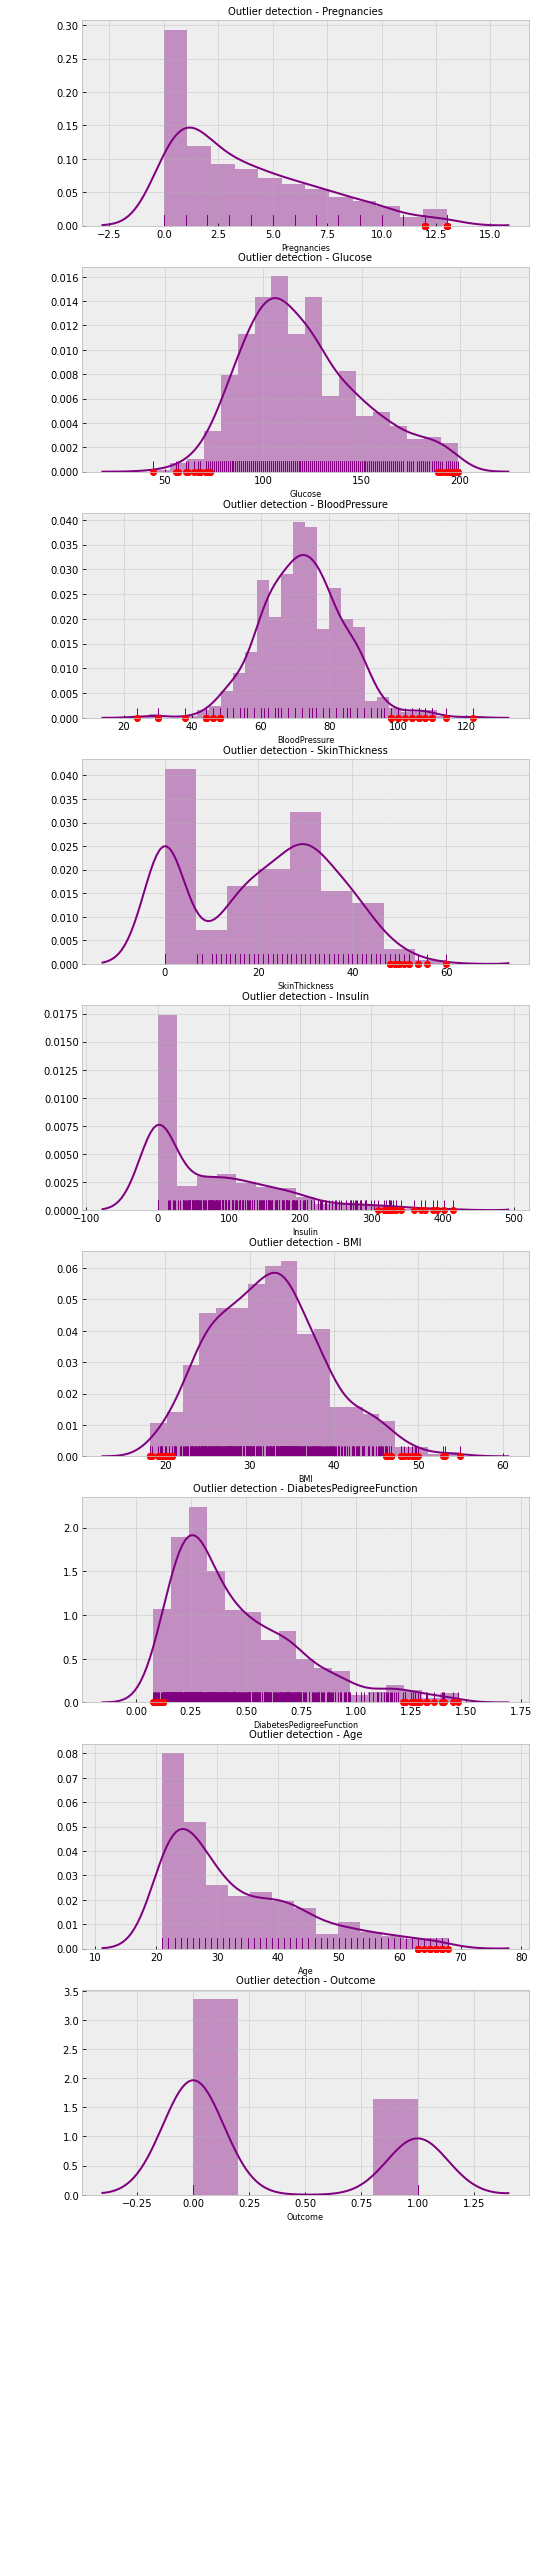

In [ ]:
# Checking for Anomalies
#
plt.style.use('bmh')

def percentile_based_outlier(data, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(data, [diff, 100 - diff])
  return (data < minval) | (data > maxval)

col_names = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin', 'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']  

fig, ax = plt.subplots(len(col_names), figsize=(8, 40))

for i, col_val in enumerate(col_names):
  x = data[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=True, color='purple')
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Outlier detection - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show() 

In [ ]:
# Identifying the Missing Data
#

data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#

In [ ]:
# More data cleaning procedures
#
data = data.drop(columns=['Unnamed: 0'])
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
683,10,101,76,48,180,32.9,0.171,63,0
684,2,122,70,27,0,36.8,0.340,27,0
685,5,121,72,23,112,26.2,0.245,30,0
686,1,126,60,0,0,30.1,0.349,47,1


## 6. Exploratory Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
data.mean()

Pregnancies                   3.845930
Glucose                     120.293605
BloodPressure                72.345930
SkinThickness                20.787791
Insulin                      72.507267
BMI                          32.209157
DiabetesPedigreeFunction      0.454555
Age                          33.094477
Outcome                       0.329942
dtype: float64

In [ ]:
data.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

In [ ]:
data.kurt()

Pregnancies                -0.171755
Glucose                    -0.155400
BloodPressure               0.937102
SkinThickness              -1.155579
Insulin                     1.056301
BMI                        -0.063707
DiabetesPedigreeFunction    1.026313
Age                         0.299418
Outcome                    -1.478772
dtype: float64

In [ ]:
data.std()

Pregnancies                  3.279256
Glucose                     30.005790
BloodPressure               12.312859
SkinThickness               15.405391
Insulin                     90.106939
BMI                          6.618891
DiabetesPedigreeFunction     0.284527
Age                         11.436990
Outcome                      0.470534
dtype: float64

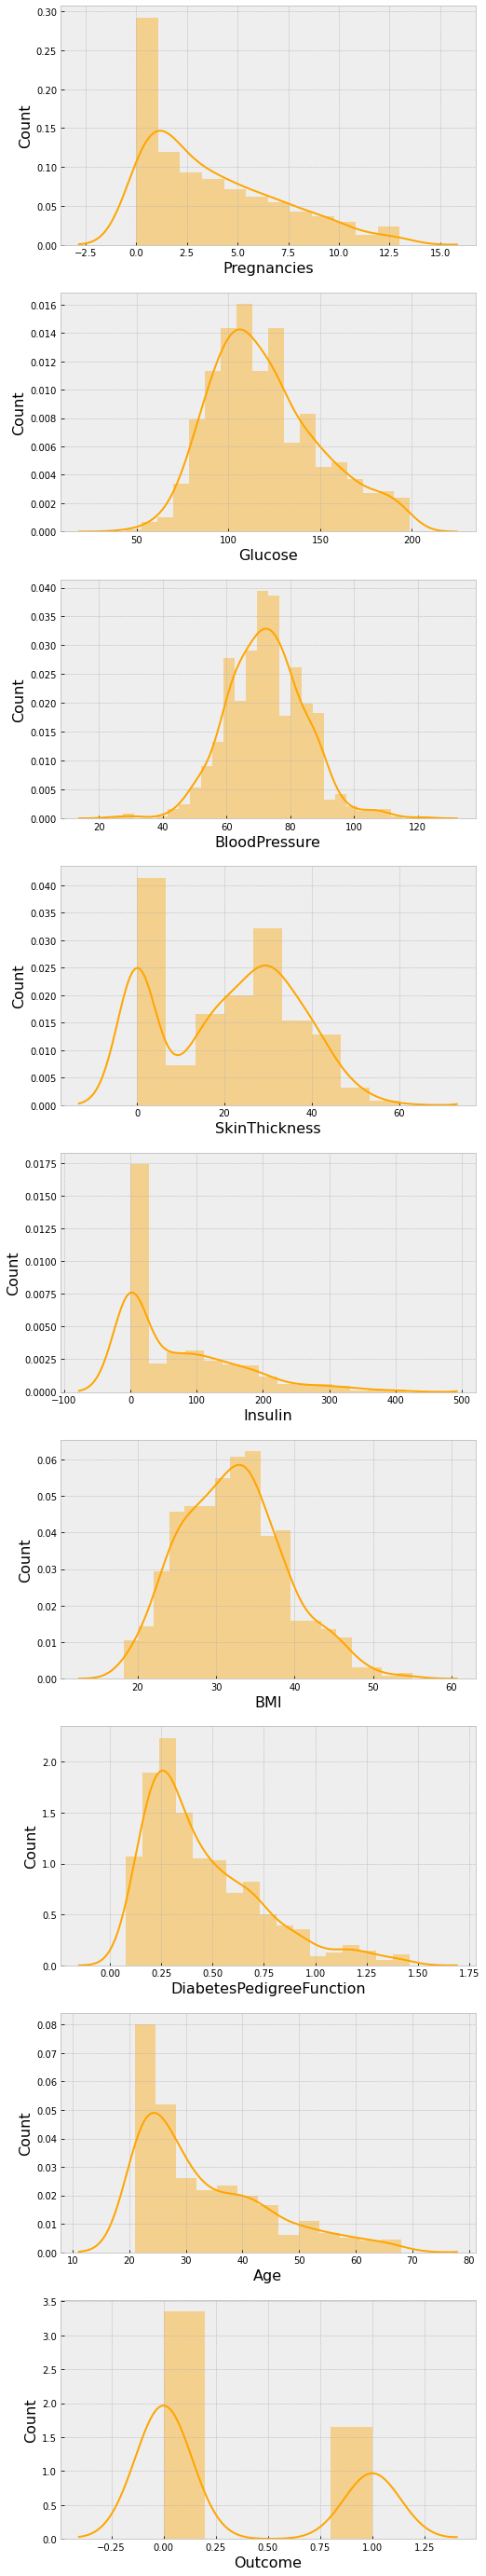

In [ ]:
columns = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin', 'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']

fig, ax = plt.subplots(data.shape[1], figsize=(8,50))

for i, col_val in enumerate(columns):
  sns.distplot(data[col_val], hist=True, ax=ax[i], color='orange')
  ax[i].set_xlabel(f"{col_val}", fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

In [ ]:
# Data Reduction
#

correlations = data.corr()

correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.156470,0.229881,-0.097721,-0.080638,0.043549,0.015522,0.569787,0.226382
Glucose,0.156470,1.000000,0.240560,0.008577,0.272654,0.196665,0.104521,0.266930,0.478614
BloodPressure,0.229881,0.240560,1.000000,0.005076,-0.070572,0.274707,0.032757,0.354391,0.182521
SkinThickness,-0.097721,0.008577,0.005076,1.000000,0.462778,0.383819,0.153530,-0.150039,0.056662
Insulin,-0.080638,0.272654,-0.070572,0.462778,1.000000,0.165428,0.183184,-0.081003,0.110062
BMI,0.043549,0.196665,0.274707,0.383819,0.165428,1.000000,0.125714,0.059980,0.298056
DiabetesPedigreeFunction,0.015522,0.104521,0.032757,0.153530,0.183184,0.125714,1.000000,0.060663,0.213872
Age,0.569787,0.266930,0.354391,-0.150039,-0.081003,0.059980,0.060663,1.000000,0.246290
Outcome,0.226382,0.478614,0.182521,0.056662,0.110062,0.298056,0.213872,0.246290,1.000000


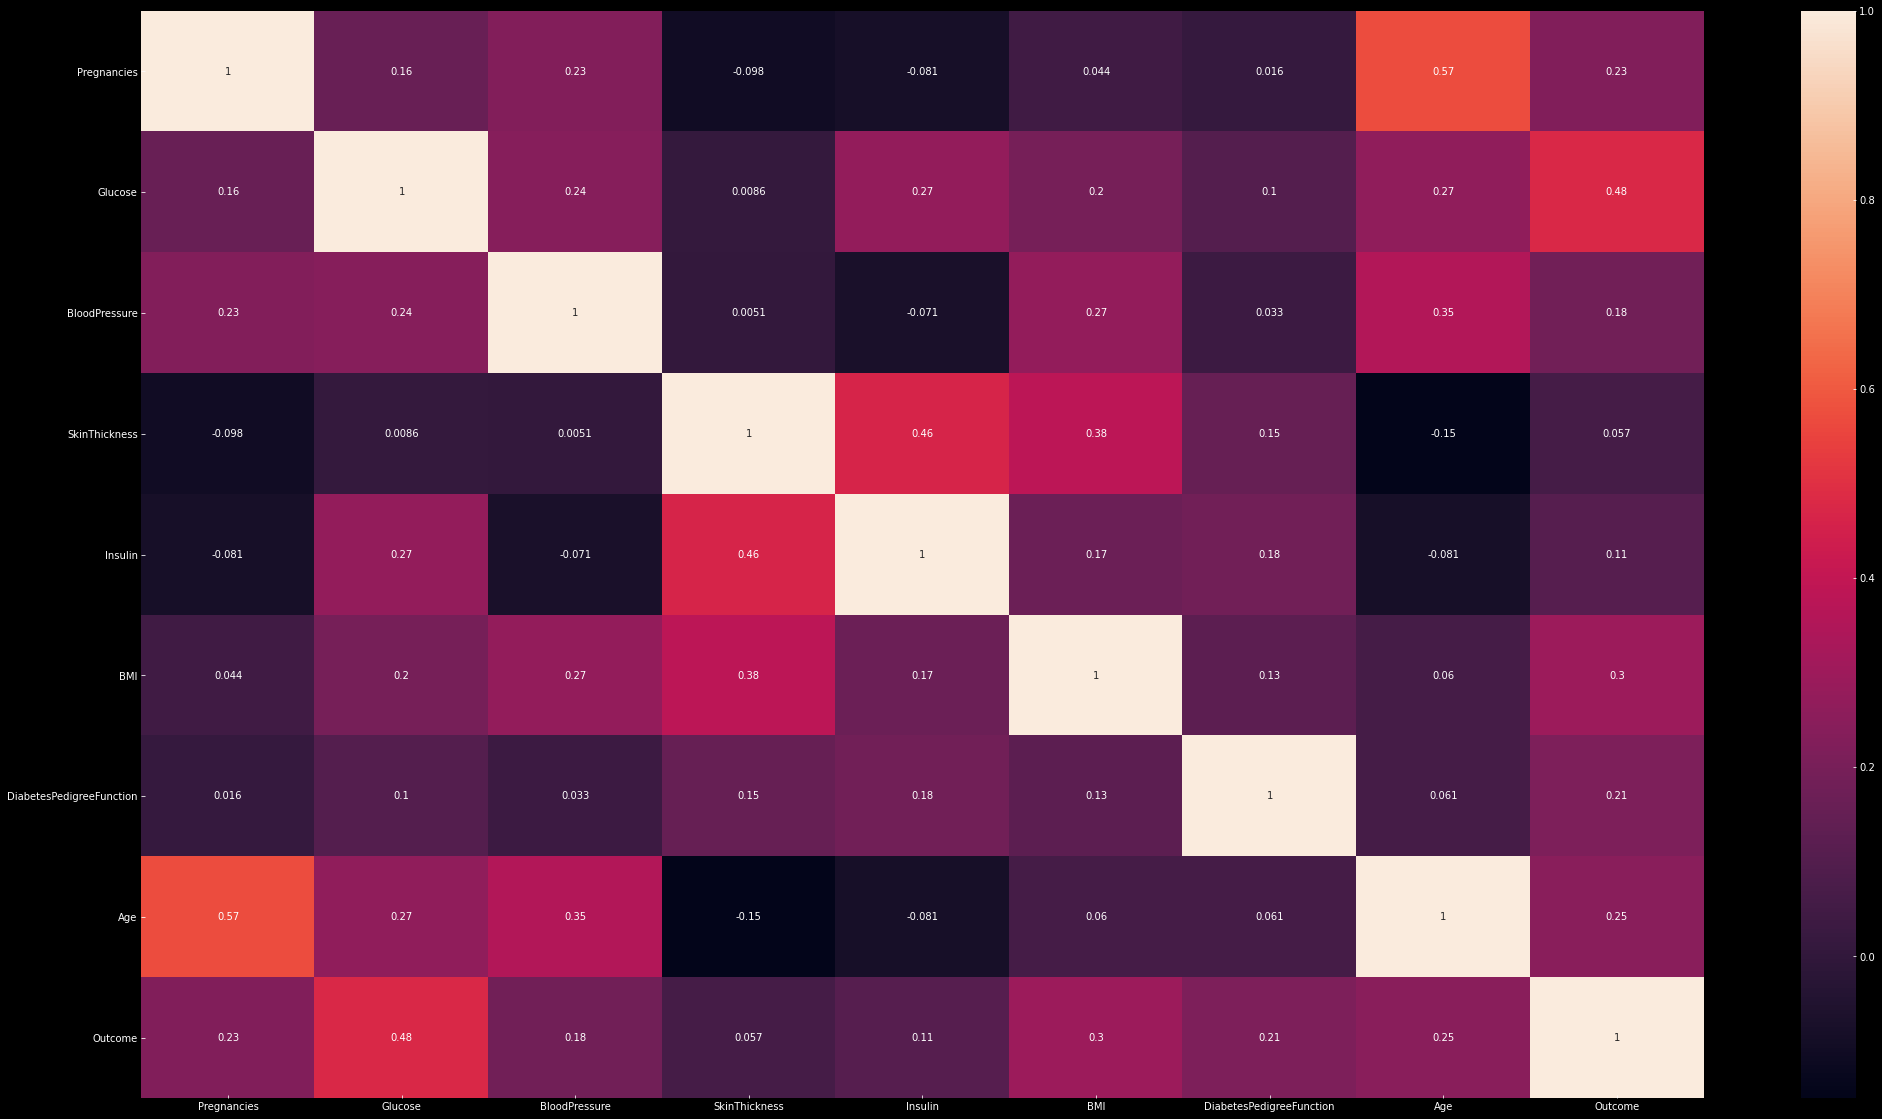

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize= (35,20))
sns.heatmap(data.corr(), annot=True)

In [ ]:
df = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.508803,0.057265,-0.043664,-0.003453,0.045230,0.026188,0.049667,-0.815803,-0.183290
Glucose,0.057265,1.527307,-0.210847,0.239063,-0.486451,-0.070123,0.049481,-0.219902,-0.600999
BloodPressure,-0.043664,-0.210847,1.278131,-0.022632,0.173493,-0.319379,0.005400,-0.352287,0.040503
SkinThickness,-0.003453,0.239063,-0.022632,1.544470,-0.667919,-0.525429,-0.085140,0.157392,0.012545
Insulin,0.045230,-0.486451,0.173493,-0.667919,1.472127,0.053539,-0.147399,0.050125,0.069959
BMI,0.026188,-0.070123,-0.319379,-0.525429,0.053539,1.385426,-0.022406,0.036433,-0.307310
DiabetesPedigreeFunction,0.049667,0.049481,0.005400,-0.085140,-0.147399,-0.022406,1.088956,-0.078219,-0.221819
Age,-0.815803,-0.219902,-0.352287,0.157392,0.050125,0.036433,-0.078219,1.696381,-0.072136
Outcome,-0.183290,-0.600999,0.040503,0.012545,0.069959,-0.307310,-0.221819,-0.072136,1.470139


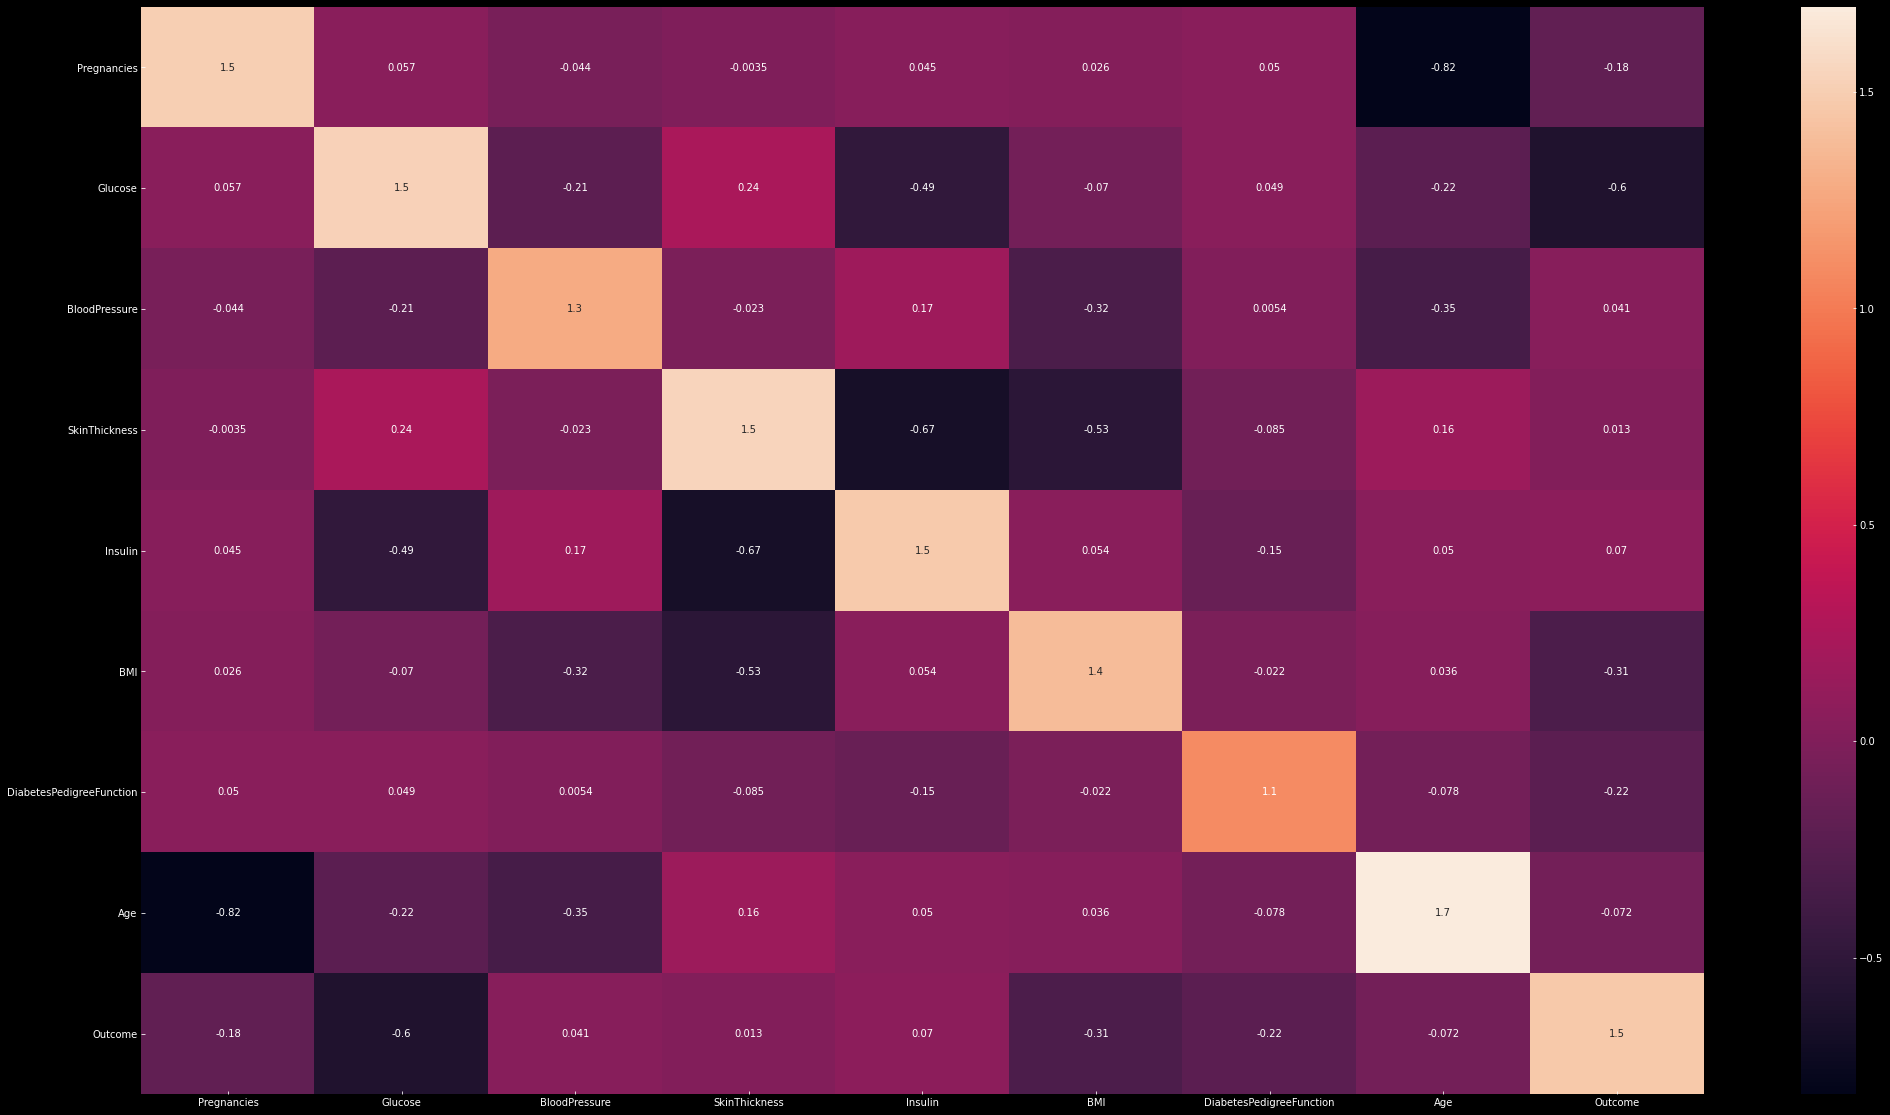

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize= (35,20))
sns.heatmap(df, annot=True)

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 
# Multinomial bayes classifier

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Training the Model

# We will start by splitting our data into training and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [ ]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.6739130434782609


In [ ]:
# Normalizing the data. 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?